# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [7]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target,columns=["target"])

## Perform a train-test-split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Apply your model to the train set

#### Importing and initializing the model class

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


#### Fitting the model to the train data

In [15]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [16]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

#### Calculating your residuals

In [18]:
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test
print(train_residuals)
print(test_residuals)

        target
68   -0.621595
216  -1.283527
278  -1.991911
425   1.508442
162   0.174571
272   2.182901
450   1.971383
181 -11.892432
93    3.276892
26    0.057426
137   4.096419
168  -1.278367
154   5.177226
151  -0.487481
438  -1.422614
408  -5.174714
27    0.200091
329   3.040271
334   5.406003
200  -0.315709
433   2.038583
293  -0.490656
127   1.086477
241  -1.261267
143  -3.073257
453   3.611655
316  -2.679880
52    4.345950
38   -2.711286
169   0.389441
..         ...
481   3.863806
451   3.375343
393   6.336471
117   3.633660
422  -2.705696
504   8.520711
289  -2.288170
264  -6.806138
242  -2.001017
55   -3.565003
340   3.719266
455   0.611099
71   -0.433943
297  -5.016326
31    4.597618
311   7.192029
320   2.897743
66    0.610305
170   0.528628
279  -2.655928
155   4.300998
153  -2.227594
343   2.994943
357   2.490894
62    4.142188
411  -2.834043
363   4.928411
381   6.996056
11   -0.990203
50   -2.315388

[379 rows x 1 columns]
        target
80    2.532085
350   4.349108
4

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [19]:
from sklearn import metrics

In [20]:
train_mse = metrics.mean_squared_error(y_train, y_pred_train)
test_mse = metrics.mean_squared_error(y_test, y_pred_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 21.28417673934102
Test Mean Squarred Error: 23.506301486166087


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

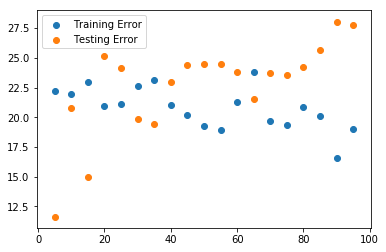

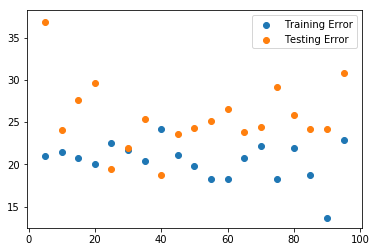

In [22]:
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(metrics.mean_squared_error(y_train, y_hat_train))
    test_err.append(metrics.mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

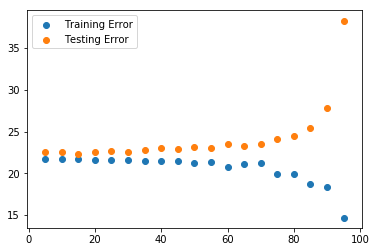

In [24]:

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(metrics.mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(metrics.mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

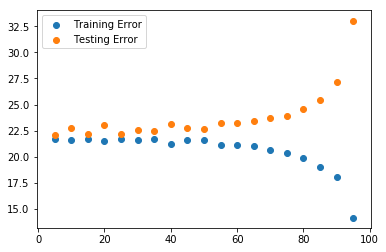

What's happening here? evaluate your result!

At some point in time, when too much data is evaluated with the same test-train model, it is no longer viable to use and more data must be collected.

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.